In [ ]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.2


In [ ]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

40960/30286 [========================================] - 0s 4us/step


'/root/.keras/datasets/auto-mpg.data'

In [ ]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, #데이터 불러오기 
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy() #카피함수통해서 rawdata set이 똑같이 복사 됨.
dataset.tail(10) #상위 10개의 데이터를 보고 싶다. 만약 하위 10개면 tail 사용

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
388,26.0,4,156.0,92.0,2585.0,14.5,82,1
389,22.0,6,232.0,112.0,2835.0,14.7,82,1
390,32.0,4,144.0,96.0,2665.0,13.9,82,3
391,36.0,4,135.0,84.0,2370.0,13.0,82,1
392,27.0,4,151.0,90.0,2950.0,17.3,82,1
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [ ]:
dataset.isna().sum() #결측치 몇개인지 확인할 수 있음 


MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [ ]:
dataset = dataset.dropna() #결측치에 대해서 dropna 함수 이용해서 제거 해줌

In [ ]:
# 원핫인코딩위해서는 오리진 데이터를 pop 함수를 통해 따로 빼줌. (오리진은 상수데이터가 아님!)
origin = dataset.pop('Origin')
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [ ]:
dataset #오리진이 빠진 데이터 확인

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [ ]:
#오리진이 1이면 USA 칼럼에 1 넣어주고 등등... 
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.head()
#여기까지 데이터 전처리 완료. 이 이후에는 트레인 테스트로 분류를 해줄거임. 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


In [ ]:

train_dataset = dataset.sample(frac=0.8,random_state=0)#트레인 데이터는 80퍼는 트레인 데이터를 쓰고, 
test_dataset = dataset.drop(train_dataset.index) #남은 데이터의 인덱스에 대해서는 test dataset을 쓰겠다. 

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("MPG") #엠피지 데이터 셋은 라벨(예측값으ㄹㅗ)사용할 거심. 
# train_stats트레인데이터에 대해 간단히 요약

count    314.000000
mean      23.310510
std        7.728652
min       10.000000
25%       17.000000
50%       22.000000
75%       28.950000
max       46.600000
Name: MPG, dtype: float64

In [ ]:
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_labels = train_dataset.pop('MPG') #y
test_labels = test_dataset.pop('MPG')

In [ ]:
#정규화 ~~ 
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [ ]:
normed_train_data

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852
...,...,...,...,...,...,...,...,...,...
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852


In [ ]:
#트레인데이타셋에대해서 키값을 확인해보면, 컬럼들이 있는거 확인할 수 있음. 
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [ ]:
#모델구성 
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', 
                 input_shape=[len(train_dataset.keys())]), #인풋은 하나의 행에 대해 입력값이 들어가기때문에 len으로 지정해주고 
    layers.Dense(64, activation='relu'), #히든레이어지정
    layers.Dense(1)
  ]) #하여튼 sequential 통해서 블락을 하나씩 쌓아가면 됨. 

  optimizer = tf.keras.optimizers.RMSprop(0.001) #러닝메이트 적용 (학습률)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse']) #이걸로 할거야 ~~ 
  return model

In [ ]:
#만든 모델 확인 
model = build_model()


In [ ]:
#써머리 볼 수 있음. 
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1) #트레인데이터 20프로를 이용하고, 학습하겠다. 

Epoch 1/100
8/8 [==============================] - 3s 27ms/step - loss: 549.3515 - mae: 22.0981 - mse: 549.3515 - val_loss: 529.8681 - val_mae: 21.6524 - val_mse: 529.8681
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 481.2033 - mae: 20.5975 - mse: 481.2033 - val_loss: 461.3032 - val_mae: 20.0893 - val_mse: 461.3032
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 416.6130 - mae: 19.0576 - mse: 416.6130 - val_loss: 391.0800 - val_mae: 18.3304 - val_mse: 391.0800
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 350.0080 - mae: 17.2897 - mse: 350.0080 - val_loss: 318.4531 - val_mae: 16.3189 - val_mse: 318.4531
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 282.2843 - mae: 15.3129 - mse: 282.2843 - val_loss: 247.5065 - val_mae: 14.1321 - val_mse: 247.5065
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 217.6658 - mae: 13.2397 - mse: 217.6658 - val_loss: 182.3544 - val_mae: 1

In [ ]:
hist = pd.DataFrame(history.history) 
hist['epoch'] = history.epoch
hist.tail()
#결과값 확인. 마지막 100번째에 대해서만 확인하고싶어서 tail 사용 

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
95,5.977059,1.711235,5.977059,8.445406,2.291492,8.445406,95
96,5.895553,1.713024,5.895553,8.403694,2.159484,8.403694,96
97,5.974922,1.699651,5.974922,8.273555,2.181418,8.273555,97
98,6.053592,1.735132,6.053592,8.424673,2.224149,8.424673,98
99,5.904955,1.708848,5.904955,8.329144,2.190742,8.329144,99


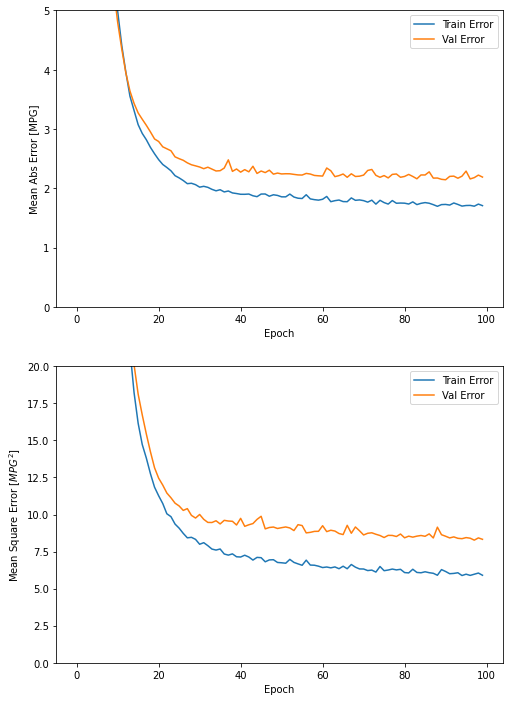

In [ ]:
import matplotlib.pyplot as plt #학습되는 loss 에대해서 에폭에 따른 mse와 mae값 보기 ..

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)


#밑에 그래프 보면, 아 트레인 에러가 낮아질수록 벨류에이션 에러가 커졌구나.. ??

Epoch 1/100
8/8 [==============================] - 1s 24ms/step - loss: 555.4807 - mae: 22.2312 - mse: 555.4807 - val_loss: 542.6417 - val_mae: 21.8652 - val_mse: 542.6417
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 500.7346 - mae: 20.9355 - mse: 500.7346 - val_loss: 485.2199 - val_mae: 20.4647 - val_mse: 485.2199
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 447.4504 - mae: 19.5859 - mse: 447.4504 - val_loss: 425.1287 - val_mae: 18.9114 - val_mse: 425.1287
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 390.1953 - mae: 18.0766 - mse: 390.1953 - val_loss: 360.8498 - val_mae: 17.1389 - val_mse: 360.8498
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 330.5425 - mae: 16.3720 - mse: 330.5425 - val_loss: 297.1059 - val_mae: 15.2919 - val_mse: 297.1059
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 271.2022 - mae: 14.6211 - mse: 271.2022 - val_loss: 234.0641 - val_mae: 1

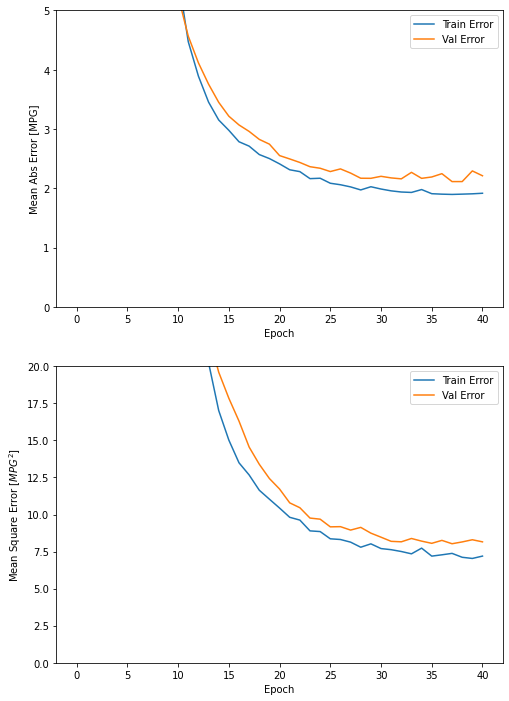

In [ ]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3) #조기종료모델

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1, callbacks=[early_stop]) #콜백 사용! 

plot_history(history)

#밑에 그림 보면, 얼리스탑 진행해도 별 차이없으니 100번의 에폭 진행하게 됨. patience 좀더 줄이게 된다면 41번째에서 종료되는거 확인가능..
#페이션스는 에폭수 많으면 늘려줘도 되고 적을때는 작게 설정해주면 됨. 

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 6.1880 - mae: 1.8578 - mse: 6.1880 - 22ms/epoch - 7ms/step
테스트 세트의 평균 절대 오차:  1.86 MPG


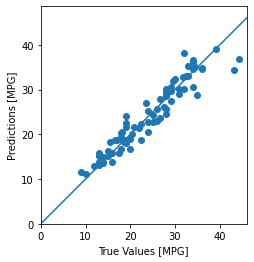

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

In [ ]:
#테스트 데이터셋에 대해서 예측이 잘 되었구나 ~ 1.86오차를 갖는 모델을 만들었다~ 